<a href="https://colab.research.google.com/github/sharlenechen0113/CDSS-2021-Hackathon/blob/main/regression_on_news_(source_only).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

lists = ['05-01-2020', '07-01-2020','09-01-2020','11-01-2020']
final_news_real = pd.DataFrame({"news_id":[],"tweet_id":[],"reply_id":[]})
final_news_fake = pd.DataFrame({"news_id":[],"tweet_id":[],"reply_id":[]})

for link in lists:
  news_real = pd.read_csv('drive/MyDrive/Data_Hackathon/Data/{}/NewsRealCOVID-19.csv'.format(link))
  news_real_tweets = pd.read_csv('drive/MyDrive/Data_Hackathon/Data/{}/NewsRealCOVID-19_tweets.csv'.format(link))
  news_real_replies = pd.read_csv('drive/MyDrive/Data_Hackathon/Data/{}/NewsRealCOVID-19_tweets_replies.csv'.format(link))

  # real tweets counts 
  sum_of_tweets = news_real_tweets.groupby(['index']).tweet_id.count().reset_index()
  sum_of_tweets.rename(columns = {'index':'news_id'},inplace=True)

  # real replies counts
  sum_of_replies_real = news_real_replies.groupby(['news_id']).reply_id.count().reset_index()
  sum_of_replies_real_by_tweet = news_real_replies.groupby(['news_id','tweet_id']).reply_id.count().reset_index()

  news_real_sum = sum_of_tweets.merge(sum_of_replies_real,how='left',on='news_id')
  news_real_sum['reply_id'].fillna(0,inplace=True)
  # news_real.rename(columns={'index':'news_id'},inplace=True)
  news_real_sum = news_real.merge(news_real_sum,left_index=True,right_on='news_id')
  final_news_real = pd.concat([final_news_real, news_real_sum])


  news_fake = pd.read_csv('drive/MyDrive/Data_Hackathon/Data/{}/NewsFakeCOVID-19.csv'.format(link))
  news_fake_tweets = pd.read_csv('drive/MyDrive/Data_Hackathon/Data/{}/NewsFakeCOVID-19_tweets.csv'.format(link))
  news_fake_replies = pd.read_csv('drive/MyDrive/Data_Hackathon/Data/{}/NewsFakeCOVID-19_tweets_replies.csv'.format(link))

  # real tweets counts 
  sum_of_tweets_fake = news_fake_tweets.groupby(['index']).tweet_id.count().reset_index()
  sum_of_tweets_fake.rename(columns = {'index':'news_id'},inplace=True)

  # real replies counts
  sum_of_replies_fake = news_fake_replies.groupby(['news_id']).reply_id.count().reset_index()
  sum_of_replies_fake_by_tweet = news_fake_replies.groupby(['news_id','tweet_id']).reply_id.count().reset_index()

  news_fake_sum = sum_of_tweets_fake.merge(sum_of_replies_fake,how='left',on='news_id')
  news_fake_sum['reply_id'].fillna(0,inplace=True)
  # news_fake.rename(columns={'index':'news_id'},inplace=True)
  news_fake_sum = news_fake.merge(news_fake_sum,left_index=True,right_on='news_id')
  final_news_fake = pd.concat([final_news_fake, news_fake_sum])

print(final_news_real)

      news_id  ...                                      meta_keywords
0         0.0  ...  "coronavirus outbreak, viral outbreak, viral i...
1         1.0  ...  "screen time, child development, smartphones, ...
2         2.0  ...  "covid-19 coronavirus outbreak research progre...
3         3.0  ...  "coronavirus, viral infection, viral outbreak,...
4         4.0  ...  "covid-19, covornavirus, novel coronavirus, vi...
...       ...  ...                                                ...
1444   1548.0  ...                                                 ""
1445   1550.0  ...                                                 ""
1446   1551.0  ...                                                 ""
1447   1553.0  ...                                                 ""
1448   1554.0  ...                                                 ""

[1449 rows x 13 columns]


      news_id  tweet_id  ...  news_url4  news_url5
0         0.0     500.0  ...        NaN        NaN
1         1.0       2.0  ...        NaN        NaN
2         2.0       2.0  ...        NaN        NaN
3         3.0       1.0  ...        NaN        NaN
4         4.0       1.0  ...        NaN        NaN
...       ...       ...  ...        ...        ...
1508    558.0     390.0  ...        NaN        NaN
1509    561.0     500.0  ...        NaN        NaN
1510    562.0       6.0  ...        NaN        NaN
1511    565.0     115.0  ...        NaN        NaN
1512    570.0      27.0  ...        NaN        NaN

[1513 rows x 19 columns]
500.0
1675.0


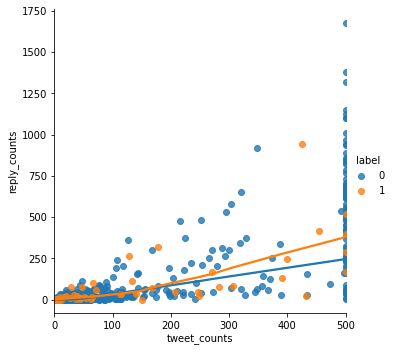

In [ ]:
final_news_real['label'] = 0
final_news_fake['label'] = 1
final_news = pd.concat([final_news_real,final_news_fake],ignore_index=True)
print(final_news)
print(final_news.tweet_id.max())
print(final_news.reply_id.max())

import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.lmplot(x='tweet_id',y='reply_id',data=final_news,hue='label',lowess=True)
plot.set(xlim=(0,500))
plt.xlabel('tweet_counts')
plt.ylabel('reply_counts')
# plt.scatter(final_news_real.tweet_id,final_news_real.reply_id)
plt.show()

In [ ]:
final_news['engagement'] = final_news.tweet_id + final_news.reply_id
print(final_news.head())

   news_id  tweet_id  reply_id  ...  news_url4 news_url5 engagement
0      0.0     500.0     255.0  ...        NaN       NaN      755.0
1      1.0       2.0       1.0  ...        NaN       NaN        3.0
2      2.0       2.0       0.0  ...        NaN       NaN        2.0
3      3.0       1.0       0.0  ...        NaN       NaN        1.0
4      4.0       1.0       0.0  ...        NaN       NaN        1.0

[5 rows x 20 columns]


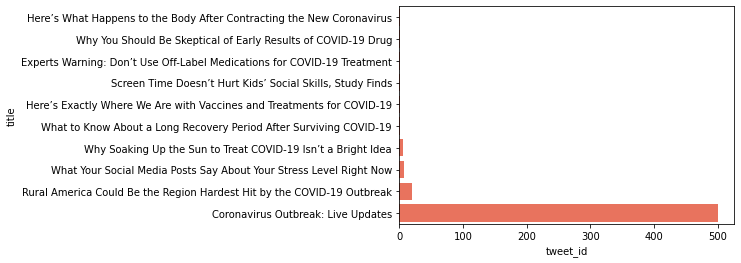

In [ ]:
sns.barplot(x='tweet_id',y='title',data=final_news_real[['title','tweet_id']][0:10].sort_values(by='tweet_id'),orient='h', color='tomato')
plt.show()

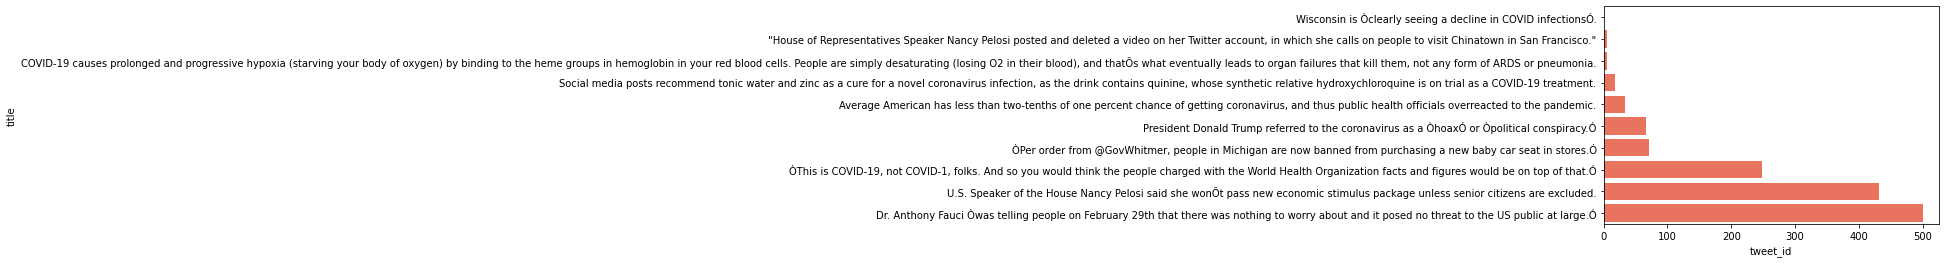

In [ ]:
sns.barplot(x='tweet_id',y='title',data=final_news_fake[['title','tweet_id']][0:10].sort_values(by='tweet_id'),orient='h', color='tomato')
plt.show()

In [ ]:
final_news.drop(columns=['news_url2','news_url3','news_url4','news_url5','publish_date','archive','Unnamed: 0'],inplace=True)

In [ ]:
final_news.drop(columns=['abstract','content','newstitle','meta_keywords'],inplace=True)

In [ ]:
final_news['source'] = final_news['news_url'].str.split("//").str[1].str.split('/').str[0]

In [ ]:
final_news.rename(columns={"tweet_id":"tweet_counts"},inplace=True)
final_news.rename(columns={"reply_id":"reply_counts"},inplace=True)
final_news.rename(columns={"type":"types"},inplace=True)

type_col = pd.get_dummies(final_news.types,prefix='Type')
final_news.drop(columns=['types'],inplace=True)
final_news = final_news.join(type_col)

In [ ]:
def if_social_media(row):
  if row['source'] == 'www.facebook.com' or row['source'] == 'www.youtube.com' or row['source'] =='twitter.com' or row['source'] =='youtu.be' or row['source'] =='www.instagram.com':
    return 1
  else:
    return 0

final_news['social_media'] = final_news.apply(lambda row: if_social_media(row),axis=1)
final_news.drop(columns=['tweet_counts','reply_counts','fact_check_url','news_url','title','source'],inplace=True)
final_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   news_id       1513 non-null   float64
 1   label         1513 non-null   int64  
 2   engagement    1513 non-null   float64
 3   Type_article  1513 non-null   uint8  
 4   Type_post     1513 non-null   uint8  
 5   sw_cure       1513 non-null   int64  
 6   sw_hoax       1513 non-null   int64  
 7   sw_stopped    1513 non-null   int64  
 8   sw_Nancy      1513 non-null   int64  
 9   sw_Pelosi     1513 non-null   int64  
 10  sw_video      1513 non-null   int64  
 11  sw_shared     1513 non-null   int64  
 12  sw_5G         1513 non-null   int64  
 13  sw_Melinda    1513 non-null   int64  
 14  sw_claims     1513 non-null   int64  
 15  sw_Donald     1513 non-null   int64  
 16  sw_Gates      1513 non-null   int64  
 17  sw_Bill       1513 non-null   int64  
 18  sw_Obama      1513 non-null 

In [ ]:
from sklearn import preprocessing, metrics, model_selection, linear_model, decomposition

def data_preprocess(data,mode='Train'):
  if mode == 'Train':
    # data.pop('news_id')
    train_data, val_data = model_selection.train_test_split(data,test_size=0.25)
    train_y, val_y = train_data.pop('label'), val_data.pop('label')
    return train_data, train_y, val_data, val_y

In [ ]:
x_train, y_train, x_val, y_val = data_preprocess(final_news)
standardizer = preprocessing.StandardScaler() # what are we standardizing?
x_train = standardizer.fit_transform(x_train)
classifier = linear_model.LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(x_val)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[286   1]
 [ 14   2]]


0.9504950495049505

In [ ]:
y_score = classifier.predict_proba(x_val)[:, 1]
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve,auc
average_precision = average_precision_score(y_val, y_score)
print(average_precision) # PR AUC

0.8456988887401258


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
[precision_score(y_val, y_pred),recall_score(y_val, y_pred),f1_score(y_val,y_pred)]

[0.6666666666666666, 0.125, 0.21052631578947367]

In [ ]:
from sklearn import ensemble
x_train, y_train, x_val, y_val = data_preprocess(final_news)
standardizer = preprocessing.StandardScaler()
x_train = standardizer.fit_transform(x_train)

regressor = ensemble.RandomForestClassifier(n_estimators=10,criterion = 'entropy')
regressor.fit(x_train,y_train)
prediction_a = regressor.predict(x_train)
print('Training data set error: ',metrics.mean_squared_error(prediction_a, y_train) ** 0.5)

x_val = standardizer.transform(x_val)
y_pred = regressor.predict(x_val)

Training data set error:  0.04979295977319692


In [ ]:
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[293   3]
 [  2   5]]


0.9834983498349835

In [ ]:
y_score_rf = regressor.predict_proba(x_val)[:, 1]
average_precision = average_precision_score(y_val, y_score_rf)
print(average_precision) # PR AUC

0.7208863743517209


In [ ]:
[precision_score(y_val, y_pred),recall_score(y_val, y_pred),f1_score(y_val,y_pred)]

[0.625, 0.7142857142857143, 0.6666666666666666]

In [ ]:
import numpy as np
scores = [[0.9504950495049505,0.8608058608058609, 0.9834983498349835, 0.8608058608058609,0.9391941391941392,np.nan,np.nan], [0.2569861405288766,
0.3597217361327164,0.7208863743517209,0.3624561527023767,0.7268169023993535,0.2871,0.3937],[0.6666666666666666,0.9180327868852459,0.625,0.9180327868852459,0.9438202247191011,0.4287,0.6056],[0.125,0.23236514522821577,0.7142857142857143,0.23236514522821577,0.6970954356846473,0.0690,0.0581],[0.21052631578947367,0.37086092715231794,0.6666666666666666,0.37086092715231794,0.8019093078758951,0.1143,0.1045]]
scores_table = pd.DataFrame(scores,columns=["logreg w/ source","logreg w/ keyword","rf w/ source","rf w/ keyword","rf w/ keyword + source", "Benchmark w/ log","Benchmark w/ rf" ],index=["accuracy","PR AUC","Precision","Recall Score","F1 Score"])

NameError: ignored